In [1]:
from sympy import *
%matplotlib inline


init_printing(use_latex=True)

# Markdown Tutorial

## Markdown Cells

Cells which contain text are called "markdown" cells. In markdown cells acutally use a text formatting language called markdown. To make a cell into a markdown cell, choose the option "Markdown" from the drop down menu on the tool bar above. 

Markdown cells are run in the same way as code cells: by pressing ```shift + enter```. Once a markdown cell has been run, it appears as plain text. To edit a markdown cell, double click on it.

### Headings
Markdown cells can contain headings and subheadings to keep writing organized. To create a heading, type from one to six ```#```s at the beginning of a line followed by a space and the name of your heading. Jupyter will automatically change the font size of the heading and turn it blue for visability. 

Markdown has 6 different levels of headings. Below are some examples of different headings. The cell below contains the largest of these headings. Double click on this cell see how these different were created.


```
# Heading 1
## Heading 2
##### Heading 5
```

# Heading 1
## Heading 2
##### Heading 5

## Emphasis: 


- Bold:
```
    __string__ or **string** 
```

 gives
 
 __string__ or **string** 
 
 
- Italic: 

```
    _string_ or *string*
```

gives

_string_ or *string*

### LaTeX
To embed LaTeX formatting in a markdown cell, surround the command with either ```$``` or ```$$```. The single dollar sign puts it inline witht the text, the the double dollar sign centers it below the text. Here is an example of a centered LaTeX command:

$$F(x) = \int_{0}^{\infty} e^{-x} dx$$


See more at http://nbviewer.jupyter.org/github/ipython/ipython/blob/1.x/examples/notebooks/Typesetting%20Math%20Using%20MathJax.ipynb

## GitHub flavored markdown
The Notebook webapp supports Github flavored markdown meaning that you can use triple backticks for code blocks:


    ```python
    print "Hello World"
    ```

gives

```python
print "Hello World"
```

and 

    ```javascript
    console.log("Hello World")
    ```
gives

```javascript
console.log("Hello World")
```

## Model:

- product equals aggregate demand, $Y = C + I +G$; 

- consumption function, $C = \bar C + c(Y−T)$; 

- investment function, $I = \bar I − bR$; 


- public spending function, $G = \bar G$; 

- income taxes function, $T = \bar T$; 

- monetary equilibrium, $M/P = kY − hR$; 

- money supply function, $M = \bar M$.

## Endogenous variables: 

- product, $Y$;

- consumption, $C$; 

- investment, $I$; 

- interest rate, $R$.

In [2]:
Y, C, I, R, P, M = symbols('Y C I R P M')

## Exogenous variables: 

- government/public spending, $\bar G$; 

- independent/autonomous consumption, $\bar C$; 

- independent/autonomous investment, $\bar I$; 

- income taxes, $\bar T$;

- money supply, $\bar M$; 

- price level (fixed), $\bar P$.

In [3]:
Gbar, Cbar, Ibar, Tbar, Mbar, Pbar = symbols( 'Gbar Cbar Ibar Tbar Mbar Pbar')

## Parameters:
- $c$ is the propensity to consume, $0 < c < 1$; 

- $b > 0$ is the interest sensitivity of investment; 

- $k > 0$ is the output sensitivity of the demand for money; 

- $h > 0$ is the interest sensitivity of the demand for money.



In [4]:
c, b, k, h = symbols('c b k h', positive = True)

## IS curve

The IS curve shows the continuum of combinations of the interest and production level at which there is equilibrium in the goods and services market:

In [5]:
#solve( Y - (Cbar + c*(Y-Tbar) + Ibar - b*R + Gbar),Y)

In [6]:
aggregate_demand = Eq(Y, C+I+Gbar)
aggregate_demand

In [7]:
consumption_function=Eq(C,Cbar+c*(Y-Tbar))
consumption_function

In [8]:
investment_function=Eq(  I,Ibar-b*R)
investment_function

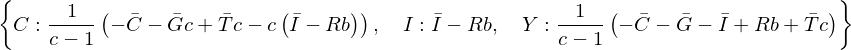

In [9]:
ISsol=solve( [aggregate_demand,consumption_function,investment_function],[Y,C,I])
ISsol

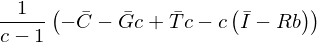

In [10]:
ISsol[C]

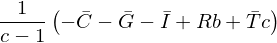

In [11]:
ISsol[Y]

In [12]:
ISsol[I]

## IS−LM model 

- monetary equilibrium, $M/P = kY − hR$; 

- money supply function, $M = \bar M$.

###  <span style="color:red">It is your turn to solve it</span>

## IS−LM model 

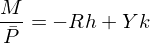

In [13]:
monetary_equilibrium= Eq( M/Pbar,k*Y-h*R) ;
monetary_equilibrium

In [14]:
money_supply_function=Eq(M,Mbar)  
money_supply_function

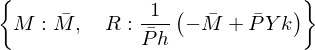

In [15]:
LMsol=solve([monetary_equilibrium,money_supply_function],[R,M])
LMsol

## Solve equilibrium for IS-LM

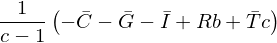

In [16]:
ISsol[Y]

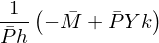

In [17]:
LMsol[R]

In [18]:
ISLMsol=solve([Eq(Y,ISsol[Y]),Eq(R,LMsol[R])],[Y,R])

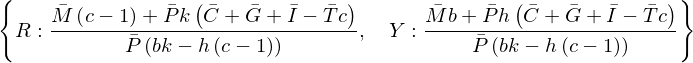

In [19]:
ISLMsol

## Consumption optimum with two goods

A consumer maximizes Cobb-Douglas utility 

$$U(c_1,c_2) = c_1^\alpha c_2^{(1-\alpha)}$$



subject to the budget constraint

$$p_1 c_1 + p_2 c_2 \leq I $$

In [20]:
c1, c2, α, p1, p2, λ, I = symbols( 'c1, c2, alpha, p1, p2, lambda,I')

In [21]:
#U = Function("U")

In [22]:
U = c1**α*c2**(1-α)
U

In [23]:
g = p1*c1+p2*c2
g

## The consumer's optimum

$$L(c_1,c_2) = U(c_1,c_2) + \lambda (I - p_1 c_1  - p_2 c_2) $$




Differentiate with respect to $c_1$ and $c_2$ and $\lambda$ to get:

$$ U_1 = \lambda{p_1}$$

$$ U_2 = \lambda{p_2}$$

$$ I = p_1 c_1  + p_2 c_2$$

In [24]:
Lag = U+ λ*(I-g)
Lag

Dividing the first equation by the second we get the familiar necessary tangency condition for an interior optimum:

$$MRS = \frac{U_1}{U_2} =\frac{p_1}{p_2}$$

Using our earlier expression for the MRS of a Cobb-Douglas indifference curve, substituting this into the budget constraint and rearranging then allows us to solve for the Marshallian demands:

$$c_1(p_1,p_2,I)=\alpha \frac{I}{p_1}$$

$$c_1(p_1,p_2,I)=(1-\alpha) \frac{I}{p_2}$$

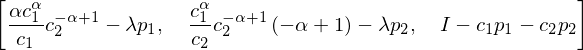

In [25]:
grad_L = [diff(Lag, x_) for x_ in [c1,c2,λ]] # List of FOCs
grad_L

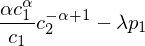

In [26]:
grad_L[0]

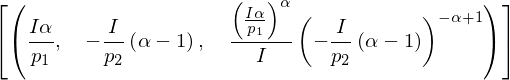

In [29]:
sols = solve(grad_L, [c1,c2,λ])
sols

## Firm production optimum with two inputs

A firm maximizes Cobb-Douglas production 

$$F(K,L) = K^\alpha L^{(1-\alpha)}$$



subject to the budget constraint

$$r L + w L \leq c $$

## The firm's optimum

$$L(K,L) = F(K,L) + \lambda (c - r L - w L ) $$




Differentiate with respect to $c_1$ and $c_2$ and $\lambda$ to get:

$$ F_K = \lambda{r}$$

$$ F_L = \lambda{w}$$

$$ c = r L + w L$$

Dividing the first equation by the second we get the familiar necessary tangency condition for an interior optimum:

$$\frac{F_K}{F_L} =\frac{r}{w}$$

substituting this into the budget constraint and rearranging then allows us to solve factor demands:

$$K(r,w,c)=\alpha \frac{c}{r}$$

$$L(r,w,c)=(1-\alpha) \frac{c}{w}$$

###  <span style="color:red">It is your turn to solve it</span>

In [30]:
K, L, α, r, w, λ, c = symbols( 'K, L, alpha, r, w, lambda, c ')

In [31]:
F = K**α*L**(1-α)
F

In [32]:
g = K*r+L*w
g

In [33]:
Lag = F+ λ*(c-g)
Lag

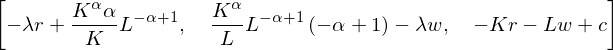

In [34]:
grad_L = [diff(Lag, x_) for x_ in [K,L,λ]] # List of FOCs
grad_L

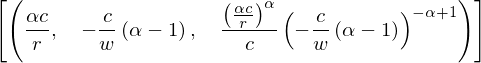

In [35]:
sols = solve(grad_L, [K,L,λ])
sols

In [36]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, fixed

To plot the budget constraint we rearrange to solve for:

$$c_2 = \frac{I}{p_2} - \frac{p_1}{p_2} c_1$$

To draw the indifference curve associated with a given utility level $\bar u$ we solve for:

$$c_2 = \left( \frac{\bar u}{c_1^\alpha}\right)^\frac{1}{1 - \alpha}$$

In [37]:
def U(c1, c2, alpha):
    return (c1**alpha)*(c2**(1-alpha))

def budgetc(c1, p1, p2, I):
    return (I/p2)-(p1/p2)*c1

def indif(c1, ubar, alpha):
    return (ubar/(c1**alpha))**(1/(1-alpha))

In [38]:
def find_opt(p1,p2,I,alpha):
    c1 = alpha * I/p1
    c2 = (1-alpha)*I/p2
    u = U(c1,c2,alpha)
    return c1, c2, u

## Interactive indifference curve diagram

In [39]:
alpha = 0.5
p1, p2 = 1, 1
I = 100

pmin, pmax = 1, 4
Imin, Imax = 10, 200
cmax = (3/4)*Imax/pmin

In [40]:
def consume_plot(p1=p1, p2=p2, I=I, alpha=alpha):
    
    c1 = np.linspace(0.1,cmax,num=100)
    c1e, c2e, uebar = find_opt(p1, p2 ,I, alpha)
    idfc = indif(c1, uebar, alpha)
    budg = budgetc(c1, p1, p2, I)
    
    fig, ax = plt.subplots(figsize=(8,8))
    ax.plot(c1, budg, lw=2.5)
    ax.plot(c1, idfc, lw=2.5)
    ax.vlines(c1e,0,c2e, linestyles="dashed")
    ax.hlines(c2e,0,c1e, linestyles="dashed")
    ax.plot(c1e,c2e,'ob')
    ax.set_xlim(0, cmax)
    ax.set_ylim(0, cmax)
    ax.set_xlabel(r'$c_1$', fontsize=16)
    ax.set_ylabel('$c_2$', fontsize=16)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.grid()
    plt.show()

In [41]:
interact(consume_plot,p1=(pmin,pmax,0.1),p2=(pmin,pmax,0.1), I=(Imin,Imax,10),alpha=(0.05,0.95,0.05))

interactive(children=(FloatSlider(value=1.0, description='p1', max=4.0, min=1.0), FloatSlider(value=1.0, description='p2', max=4.0, min=1.0), IntSlider(value=100, description='I', max=200, min=10, step=10), FloatSlider(value=0.5, description='alpha', max=0.95, min=0.05, step=0.05), Output()), _dom_classes=('widget-interact',))

<function __main__.consume_plot>

###  <span style="color:red">It is your turn to plot firm's optimum</span>

In [42]:
import numpy as np
import pprint
import scipy
import scipy.linalg   # SciPy Linear Algebra Library

In [43]:
# d, vector of the exogeneous variables 

# d = np.array([ G_bar , C_bar - c*T_bar , I_bar , M_bar/P_bar ] )


# matrix representation of the model : Ax=d 
#% A, coefficient matrix for [Y, C, I, r]
A = np.matrix([ [1, -1, -1, 0], # Y=C+I+G 
     [-c, 1, 0, 0], # C=C_bar+c(Y−T) 
     [0, 0, 1, b], # I=I_bar−br 
     [k, 0, 0, -h] ]) # M/P=kY−hr

In [44]:
def ISLM(Yguess=534, A=A, new_G_bar = 200, new_T_bar = 110, new_M_bar = 180.00,newTitle =r'Expansion of money supply ($\bar M$ increases by 20%)'):
    """ A function plotting changes in the IS-LM Model
    # parameters 
    c = 0.63  # marginal propensity to consume 

    b = 1500 #sensitivity of the investment to the interest rate 

    k = 0.6  #sensitivity of the money demand to income 

    h = 2700 #sensitivity of the money demand to the interest rate

    """
    import pprint
    import scipy
    import scipy.linalg   # SciPy Linear Algebra Library
    # parameters 
    c = 0.63 #marginal propensity to consume 

    b = 1500 #sensitivity of the investment to the interest rate 

    k = 0.6  #sensitivity of the money demand to income 

    h = 2700 #sensitivity of the money demand to the interest rate
    
    
    # policy exogenous variables 
    C_bar = 55 # autonomous consumption 

    I_bar = 75 # autonomous investment 

    G_bar = 200 #government spending 

    T_bar = 110 # tax on income 

    M_bar = 200 # money supply 

    P_bar = 1 #price level ( fixed in the short−run )
    
    # plot the solution : IS−LM diagram

    # generate a grid on Y; 
    # in this case, since this is a line, only 2 points would have been enough

    Y = np.linspace(0.95*Yguess,1.05*Yguess, num=100) 

    # IS : I=Y−C−G and I=I_bar−br expressed in terms of r

    C = C_bar+c*(Y-T_bar ) 

    I =Y-C-G_bar 

    IS=( I_bar-I ) / b  

    # LM: M_bar/P_bar=kY−hR expressed in terms of r

    LM = 1/h*( k*Y-M_bar / P_bar ) 
    
    # policy shock
    G_bar = new_G_bar #government spending 
    T_bar = new_T_bar # tax on income 
    M_bar = new_M_bar # money supply 

    # x = [Y,C,I,r] , vector of the endogeneous variables 
    # d, vector of the exogeneous variables 

    d = np.array([ G_bar , C_bar - c*T_bar , I_bar , M_bar/P_bar ] )
    
    
    # compute the endogenous variables 
    P, L ,U = scipy.linalg.lu(A) # LU factorization 

    new_x = scipy.linalg.inv(U)@(scipy.linalg.inv(P@L)@ d) # solution of the linear system

    print(" IS-LM model: closed economy \
          \n-----------------------------------------------------------\
          \nexogenous variables: \nG = 200; T = 100; M = 1800; P = 1     \
          \nproduct, Y = {0:.2f}，\
          \nconsumption, C = {1:.2f}, \
          \ninvestment, I = {2:.2f}，\
          \ninterest rate (%), r = {3:.2f}".format(new_x[0],new_x[1],new_x[2],new_x[3]*100  ))
    
    # plot the solution : IS−LM diagram

    # generate a grid on Y; in this case, since this is a line, only 2 points would have been enough

    new_Y = np.linspace(0.95*new_x[0],1.05*new_x[0], num=100) 

    # IS : I=Y−C−G and I=I_bar−br expressed in terms of r

    new_C = C_bar+c*(new_Y-T_bar ) 

    new_I =new_Y-new_C-G_bar 

    new_IS=( I_bar-new_I ) / b  

    # LM: M_bar/P_bar=kY−hr expressed in terms of r

    new_LM = 1/h*( k*new_Y-M_bar / P_bar ) 

    plt.figure()
    l1 = plt.plot(Y, IS , '--b', label='IS line')
    l2 = plt.plot(Y, LM,  color='red', linewidth=2.0, linestyle='-', label='LM line')
    l1 = plt.plot(new_Y, new_IS , '--b', linewidth=4.0, label='new IS line')
    l2 = plt.plot(new_Y, new_LM,  color='red', linewidth=4.0, linestyle='-', label='new LM line')
    plt.xlim((500, 560))
    plt.ylim((0.036, 0.054))
    plt.title(newTitle)
    plt.legend()
    
    
    
    

In [45]:
ISLM(Yguess=534,A=A, new_G_bar = 200, new_T_bar = 110, new_M_bar = 220.00, 
     newTitle= r'Expansion of money supply ($\bar M$ increases by 20%)')

SystemError: <built-in function hasattr> returned a result with an error set

In [46]:
from IPython.core.display import HTML, Image
css_file = '../../custom.css'
HTML(open(css_file, 'r').read())